# Twitter Sentiment Analysis

### Problem Statement:

The first step is to understand the problem statement which is as follows - 
#### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. Hence the task is to classify racist or sexist tweets from other tweets.


### DataSet Description:

The data is in the form of csv. A comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.Each line of the file is a data record. Each record consists of one or more fields separated by commas. 

Given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, our objective is to predict the labels on the test dataset.

### Attribute information

ID : Corresponding ID given to the tweets in the given dataset.

tweets : The tweets collected from various sources and having either postive or negative sentiments associated to it.

label : A tweet with label '0' is of positive sentiment while a tweet with label '1' is of negative sentiment.

### Loading the libraries and data:

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [45]:
# reading the dataset
train_data = pd.read_csv('train_tweet.csv')
test_data = pd.read_csv('test_tweets.csv')

### Text Preprocessing:
#### Data Inspection:

In [46]:
print(train_data.shape)
print(test_data.shape)

(31962, 3)
(17197, 2)


Train set has 31,962 tweets and test set has 17,197 tweets.

In [47]:
# To check if there are any null values in train dataset
train_data.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [48]:
# to check if there are any null values in test dataset
test_data.isnull().any()

id       False
tweet    False
dtype: bool

In [49]:
# Non racist or sexist tweets
train_data[train_data['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [50]:
# Racist or sexist tweets
train_data[train_data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


0    29720
1     2242
Name: label, dtype: int64

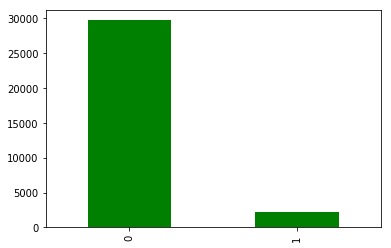

In [51]:
train_data['label'].value_counts().plot.bar(color='green')
train_data['label'].value_counts()

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced datatset.

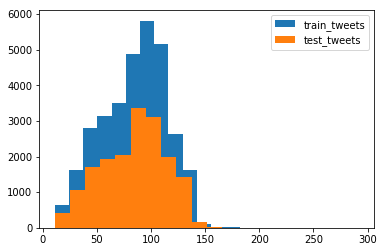

In [52]:
# checking the distribution of tweets in the data
train_len = train_data['tweet'].str.len()
test_len = test_data['tweet'].str.len()

plt.hist(train_len,bins=20,label='train_tweets')
plt.hist(test_len,bins=20,label='test_tweets')
plt.legend()
plt.show()

The tweet-length distribution is more or less the same in both train and test data.

### Data Cleaning:

In [53]:
combined_data = train_data.append(test_data, ignore_index=True)
combined_data.shape

(49159, 3)

In [54]:
# Function to remove unwanted patterns from the dataset

def rem_patterns(input_txt,pattern):
    x= re.findall(pattern,input_txt)
    for i in x:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

#### 1.Removing Twitter Handles (@user)

In [55]:
combined_data['clean_tweet'] = np.vectorize(rem_patterns)(combined_data['tweet'],'@[\w]*')
combined_data.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


#### 2.Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not add much value to our data.Hence, it is better to remove them from the text. Here we will replace everything except characters and hashtags with spaces.

In [56]:
combined_data['clean_tweet'] = combined_data['clean_tweet'].str.replace('[^a-zA-Z#]', ' ')
combined_data.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


#### 3.Removing Short Words

Short words such as 'hmm','oh,'a' etc add very little value to the text.Hence we are removing all words with length less than 3.

In [58]:
combined_data['clean_tweet'] = combined_data['clean_tweet'].apply (lambda x : ' '.join([i for i in x.split() if len(i)>3]))
combined_data.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


#### 4.Text Normalization

We will use nltk's PorterStemmer() function to normalize the tweets.Before normalization, we have to tokenize the tweets.

Tokenization is the process of splitting a string of text into tokens.

In [59]:
tokenized_tweet = combined_data['clean_tweet'].apply(lambda x : x.split())  # tokenizing
tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: clean_tweet, dtype: object

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [62]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply (lambda x : [stemmer.stem(i) for i in x])  # stemming

In [64]:
# joining the tokens back together

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined_data['clean_tweets'] = tokenized_tweet

### Visualization from Tweets:
#### A) Understanding the common words used in the tweets: WordCloud

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

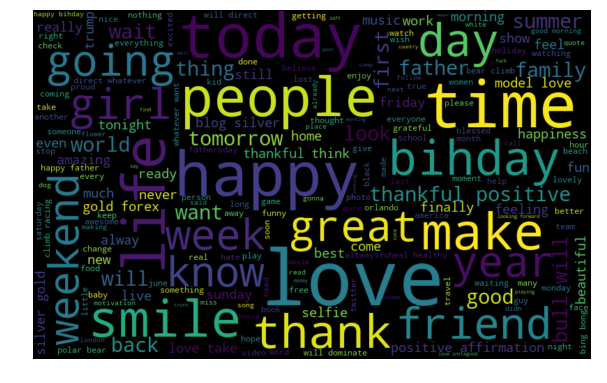

In [67]:
from wordcloud import WordCloud

words = ' '.join([text for text in combined_data['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, time, friend etc... are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the class in our train data.

#### B) Words in non racist/sexist tweets

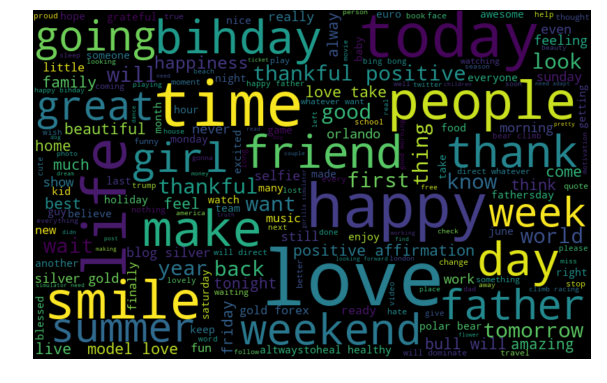

In [68]:
pos_words = ' '.join([text for text in combined_data['clean_tweet'][combined_data['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment.

#### C) Racist/Sexist Tweets

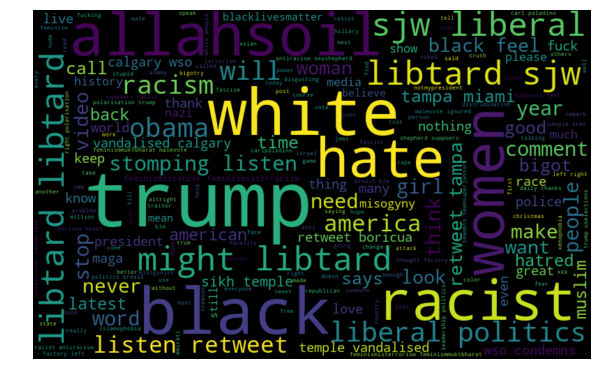

In [69]:
neg_words = ' '.join([text for text in combined_data['clean_tweet'][combined_data['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations.

Hence after visualizing both our sentiments, it seems we have a pretty good text data to work on.

#### D) Understanding the impact of Hashtags on tweets sentiment

In [70]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        he = re.findall(r"#(\w+)", i)
        hashtags.append(he)
        
    return hashtags

In [71]:
# extracting hashtags from non racist/sexist tweets
ht_pos = hashtag_extract(combined_data['clean_tweet'][combined_data['label']==0])

# extracting hashtags from racist/sexist tweets
ht_neg = hashtag_extract(combined_data['clean_tweet'][combined_data['label']==1])

# unnesting list
ht_pos = sum(ht_pos,[])
ht_neg = sum(ht_neg,[])

Since we have prepared our list of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

#### Non-Racist/Sexist Tweets

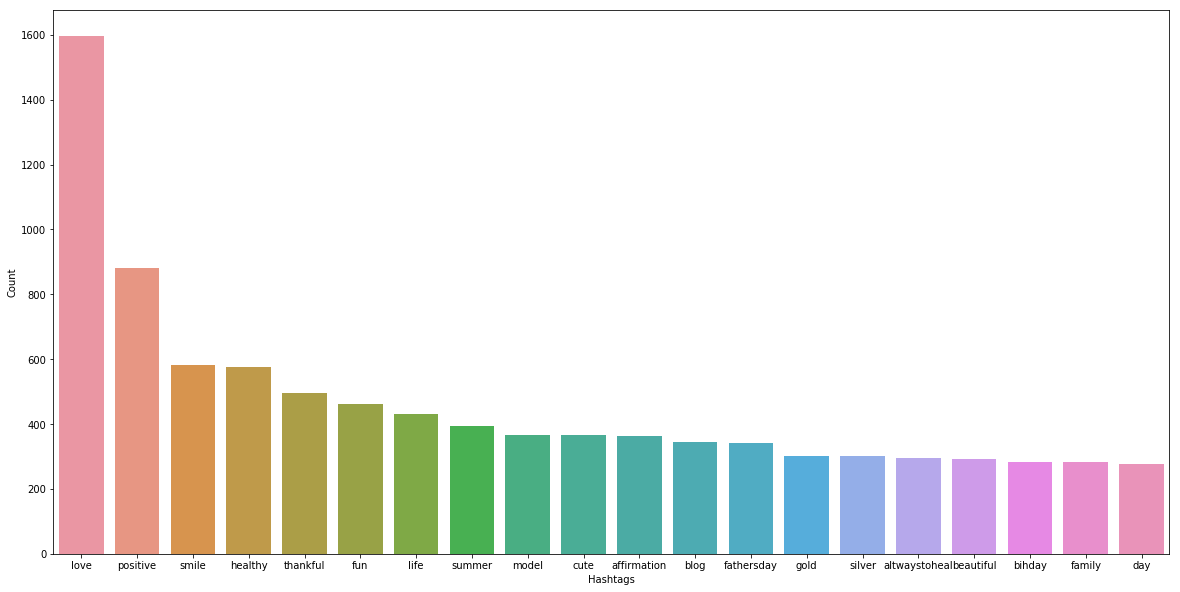

In [74]:
a = nltk.FreqDist(ht_pos)
df = pd.DataFrame({'Hashtags': list(a.keys()),
                   'Count': list(a.values())})

# selecting top 20 most frequent hashtags 
df = df.nlargest(columns = 'Count',n=20)
plt.figure(figsize=(20,10))
ax = sns.barplot(data = df, x = 'Hashtags', y = 'Count')
ax.set(ylabel = 'Count')
plt.show()

#### Racist/Sexist Tweets

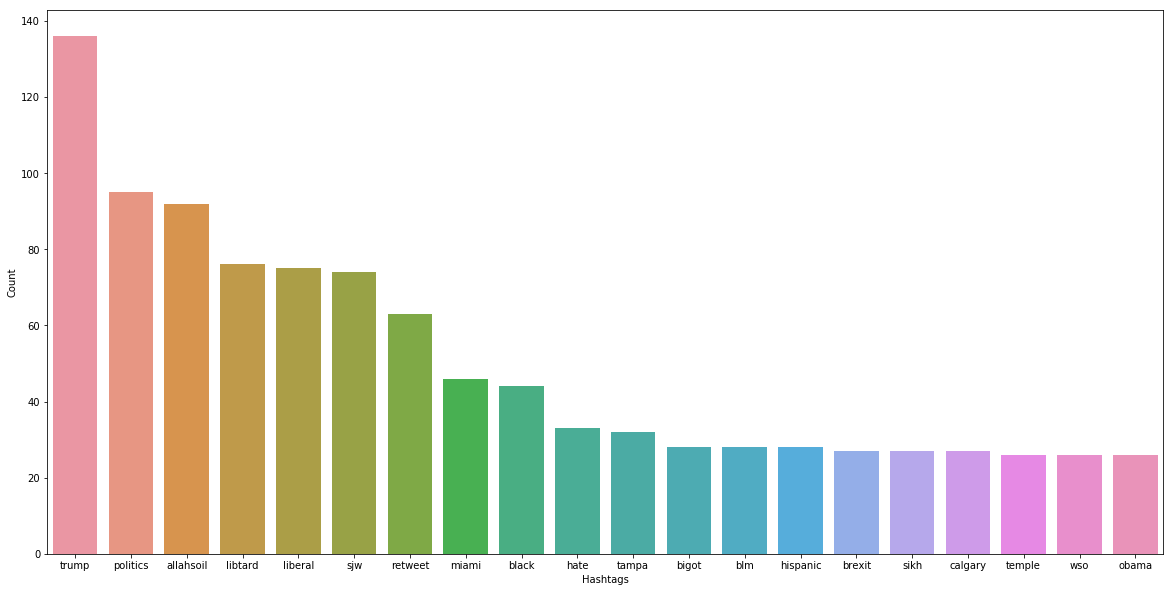

In [76]:
a = nltk.FreqDist(ht_neg)
df = pd.DataFrame({'Hashtags': list(a.keys()),
                   'Count' : list(a.values())})

df = df.nlargest(columns = 'Count',n=20)
plt.figure(figsize=(20,10))
ax = sns.barplot(data = df, x = 'Hashtags',y = 'Count')
ax.set(ylabel = 'Count')
plt.show()

As we can see from the above frequency distributions, the hashtags are separated well regarding both sentiments and contains useful information. Hence it is good if we keep the hashtags in our dataset.

Next, we will try to extract features from the tokenized tweets.

## Extracting Features from Cleaned Tweets

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

### Bag-of-Words Features

In [79]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined_data['clean_tweet'])
bow.shape

(49159, 1000)

### TF-IDF Features

In [80]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_data['clean_tweet'])
tfidf.shape

(49159, 1000)

## Word Embeddings
### 1.Word2Vec Embeddings

In [132]:
tokenized_tweet = combined_data['clean_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size = 200,
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combined_data['clean_tweet']), epochs=20)

(6480063, 7536020)

Let's see how the Word2Vec model performs by specifying a word and the model should return the most similar words from the corpus.

In [133]:
model_w2v.wv.most_similar(positive="summer")

[('latf', 0.5001106858253479),
 ('clinique', 0.49972647428512573),
 ('#plasticos', 0.47884759306907654),
 ('greencommunity', 0.4773983061313629),
 ('#doctorsdiary', 0.4746744930744171),
 ('#palmtrees', 0.46760666370391846),
 ('#summerbreak', 0.4596386253833771),
 ('#profdrferitdemirkan', 0.45939892530441284),
 ('fragrance', 0.4578532576560974),
 ('develop', 0.45653727650642395)]

In [134]:
model_w2v.wv.most_similar(negative="trump")

[('bihdayjudygarland', 0.07784690707921982),
 ('#illustration', 0.03842262923717499),
 ('#scotland', 0.03658141940832138),
 ('#vegas', 0.021971212700009346),
 ('#movie', 0.016551874577999115),
 ('#boat', 0.01444871537387371),
 ('#awork', 0.013761734589934349),
 ('dark', 0.013406947255134583),
 ('#magical', 0.011842305772006512),
 ('#fly', 0.011371521279215813)]

#### Preparing Vectors for Tweets

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [135]:
def word_vec(tokens,size):
    vec = np.zeros(size).reshape(1,size)
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape(1,size)
            count += 1
        except KeyError:
            
            continue
    
    if count!=0:
        vec /= count
    return vec

In [137]:
# Preparing word2vec feature set...
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vec(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

(49159, 200)

### 2. Doc2Vec Embedding

In [ ]:
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to tag each tokenised tweet with unique IDs. We can do so by using Gensim’s TaggedDocument() function.

In [138]:
def add_label(x):
    result=[]
    for i,s in zip(x.index,x):
        result.append(TaggedDocument(s,['Tweet_'+str(i)]))
    
    return result

In [139]:
# label all the tweets

labeled_tweet = add_label(tokenized_tweet)
labeled_tweet[0:3]

[TaggedDocument(words=['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', '#run'], tags=['Tweet_0']),
 TaggedDocument(words=['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'vans', '#disapointed', '#getthanked'], tags=['Tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['Tweet_2'])]

In [142]:
# Training a doc2vec model
d2v_model = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

d2v_model.build_vocab([i for i in (labeled_tweet)])

In [143]:
d2v_model.train(labeled_tweet, total_examples= len(combined_data['clean_tweet']), epochs=15)

In [145]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combined_data)):
    docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  """


(49159, 200)

## Machine Learning Models:

Since we have finished all the pre-modeling stages to get the data in the required form and shape, we will be applying different machine learning models on the data with different feature sets prepared in the previous section - Bag Of Words(bow),TF-IDF, word2vec vectors,doc2vec vectors.



#### Using the features from Bag-of-Words Model for training set

In [188]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Using features from TF-IDF for training set

In [189]:
train_tfidf = tfidf[:31962]
train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#### Using features from word2vec for training set

In [194]:
train_word2vec = wordvec_df.iloc[:31962]

#### Using features from doc2vec for training set

In [201]:
train_doc2vec = docvec_df.iloc[:31962]

### Splitting the data into training and validation set

In [202]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [203]:
x_train_bow,x_val_bow,y_train_bow,y_val_bow = train_test_split(train_bow,train_data['label'],test_size=0.3,random_state=42)

#### TFIDF features

In [204]:
x_train_tfidf,x_val_tfidf,y_train_tfidf,y_val_tfidf = train_test_split(train_tfidf,train_data['label'],test_size=0.3,random_state=17)

#### Word2vec features

In [205]:
x_train_w2v,x_val_w2v,y_train_w2v,y_val_w2v = train_test_split(train_word2vec,train_data['label'],test_size=0.3,random_state=42)

#### Doc2vec features

In [206]:
x_train_d2v,x_val_d2v,y_train_d2v,y_val_d2v = train_test_split(train_doc2vec,train_data['label'],test_size=0.3,random_state=42)

## 1. Logistic Regression:

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(random_state=0,solver='lbfgs')

### Using bag of words features:

In [211]:
lr.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [223]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = lr.predict_proba(x_val_bow)

prediction_bow

array([[9.99930509e-01, 6.94907012e-05],
       [9.93589242e-01, 6.41075778e-03],
       [9.48051857e-01, 5.19481428e-02],
       ...,
       [9.83941486e-01, 1.60585144e-02],
       [9.11631325e-01, 8.83686748e-02],
       [9.59793090e-01, 4.02069104e-02]])

##### Calculating the F1 score

In [239]:
# if prediction is greater than or equal to 0.3 then 1 else 0
# 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_val_bow, prediction_int)

print('F1 score for bow features:',log_bow)

F1 score for bow features: 0.5349854227405247


### Using TF-IDF Features

In [227]:
lr.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [228]:
prediction_tfidf = lr.predict_proba(x_val_tfidf)
prediction_tfidf

array([[0.98280778, 0.01719222],
       [0.96557244, 0.03442756],
       [0.94018158, 0.05981842],
       ...,
       [0.93015962, 0.06984038],
       [0.96530026, 0.03469974],
       [0.98787762, 0.01212238]])

##### Calculating the F1 score

In [238]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_val_tfidf, prediction_int)

print('F1 score for tfidf features:',log_tfidf)

F1 score for tfidf features: 0.5558534405719392


### Using Word2vec features

In [233]:
lr.fit(x_train_w2v,y_train_w2v)

LogisticRegression(random_state=0)

In [234]:
prediction_w2v = lr.predict_proba(x_val_w2v)
prediction_w2v

array([[9.95516623e-01, 4.48337725e-03],
       [9.98274871e-01, 1.72512942e-03],
       [7.47847016e-01, 2.52152984e-01],
       ...,
       [9.99896639e-01, 1.03361436e-04],
       [9.17644327e-01, 8.23556735e-02],
       [9.96436856e-01, 3.56314445e-03]])

##### Calculating the F1 score

In [237]:
prediction_int = prediction_w2v[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_w2v = f1_score(y_val_w2v, prediction_int)

print('F1 score for word2vec features:',log_w2v)

F1 score for word2vec features: 0.6105733432613553


### Using Doc2vec features

In [240]:
lr.fit(x_train_d2v,y_train_d2v)

LogisticRegression(random_state=0)

In [241]:
prediction_d2v = lr.predict_proba(x_val_d2v)
prediction_d2v

array([[0.93374647, 0.06625353],
       [0.99278787, 0.00721213],
       [0.69335621, 0.30664379],
       ...,
       [0.99477268, 0.00522732],
       [0.82619551, 0.17380449],
       [0.97894315, 0.02105685]])

##### Calculating the F1 score

In [242]:
prediction_int = prediction_d2v[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_d2v = f1_score(y_val_d2v, prediction_int)

print('F1 score for doc2vec features:',log_d2v)

F1 score for doc2vec features: 0.3509700176366843


## 2. Decision Tree

In [255]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using bag of words features:

In [256]:
dt.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [257]:
dt_bow = dt.predict_proba(x_val_bow)
dt_bow

array([[1.        , 0.        ],
       [0.96774194, 0.03225806],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ]])

##### Calculating the F1 score

In [258]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dt_bow=dt_bow[:,1]>=0.3

# converting the results to integer type
dt_int_bow=dt_bow.astype(np.int)

# calculating f1 score
dt_score_bow=f1_score(y_val_bow,dt_int_bow)

print('F1 score for bow features:',dt_score_bow)

F1 score for bow features: 0.44673123486682803


### Using TF-IDF Features

In [259]:
dt.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [260]:
dt_tfidf = dt.predict_proba(x_val_tfidf)
dt_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### Calculating F1 score

In [261]:
dt_tfidf=dt_tfidf[:,1]>=0.3

# converting the results to integer type
dt_int_tfidf=dt_tfidf.astype(np.int)

# calculating f1 score
dt_score_tfidf=f1_score(y_val_tfidf,dt_int_tfidf)

print('F1 score for tfidf features:',dt_score_tfidf)

F1 score for tfidf features: 0.5094043887147335


## Using Word2vec features

In [262]:
dt.fit(x_train_w2v,y_train_w2v)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [263]:
dt_w2v = dt.predict_proba(x_val_w2v)
dt_w2v

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### Calculating F1 score

In [264]:
dt_w2v=dt_w2v[:,1]>=0.3

# converting the results to integer type
dt_int_w2v=dt_w2v.astype(np.int)

# calculating f1 score
dt_score_w2v=f1_score(y_val_w2v,dt_int_w2v)

print('F1 score for w2v features:',dt_score_w2v)

F1 score for w2v features: 0.4759166067577282


### Using Doc2vec features

In [265]:
dt.fit(x_train_d2v,y_train_d2v)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [266]:
dt_d2v = dt.predict_proba(x_val_d2v)
dt_d2v

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

##### Calculating F1 score

In [267]:
dt_d2v=dt_d2v[:,1]>=0.3

# converting the results to integer type
dt_int_d2v=dt_d2v.astype(np.int)

# calculating f1 score
dt_score_d2v=f1_score(y_val_d2v,dt_int_d2v)

print('F1 score for d2v features:',dt_score_d2v)

F1 score for d2v features: 0.21021897810218979


## 3. Support vector machines:

In [269]:
from sklearn import svm

svc = svm.SVC(kernel='linear',C=1,probability = True)

### Using bag of words features:

In [270]:
svc.fit(x_train_bow,y_train_bow)

SVC(C=1, kernel='linear', probability=True)

In [271]:
svc_bow = svc.predict_proba(x_val_bow)
svc_bow

array([[9.99994763e-01, 5.23667890e-06],
       [9.82081747e-01, 1.79182532e-02],
       [9.79572583e-01, 2.04274169e-02],
       ...,
       [9.17945608e-01, 8.20543918e-02],
       [9.31507837e-01, 6.84921635e-02],
       [9.73906917e-01, 2.60930828e-02]])

In [272]:
svc_bow=svc_bow[:,1]>=0.3

# converting the results to integer type
svc_int_bow=svc_bow.astype(np.int)

# calculating f1 score
svc_score_bow=f1_score(y_val_bow,svc_int_bow)

print('F1 score for bow features:',svc_score_bow)

F1 score for bow features: 0.487985212569316


### Using TF-IDF Features

In [273]:
svc.fit(x_train_tfidf,y_train_tfidf)

SVC(C=1, kernel='linear', probability=True)

In [274]:
svc_tfidf = svc.predict_proba(x_val_tfidf)
svc_tfidf

array([[0.97566323, 0.02433677],
       [0.92550032, 0.07449968],
       [0.92633597, 0.07366403],
       ...,
       [0.97392822, 0.02607178],
       [0.95708356, 0.04291644],
       [0.97704659, 0.02295341]])

In [275]:
svc_tfidf=svc_tfidf[:,1]>=0.3

# converting the results to integer type
svc_int_tfidf=svc_tfidf.astype(np.int)

# calculating f1 score
svc_score_tfidf=f1_score(y_val_tfidf,svc_int_tfidf)

print('F1 score for tfidf features:',svc_score_tfidf)

F1 score for tfidf features: 0.516504854368932


### Using Word2vec features

In [276]:
svc.fit(x_train_w2v,y_train_w2v)

SVC(C=1, kernel='linear', probability=True)

In [277]:
svc_w2v = svc.predict_proba(x_val_w2v)
svc_w2v

array([[9.85191454e-01, 1.48085464e-02],
       [9.95685316e-01, 4.31468353e-03],
       [7.65538738e-01, 2.34461262e-01],
       ...,
       [9.99737182e-01, 2.62817862e-04],
       [8.94312622e-01, 1.05687378e-01],
       [9.94261504e-01, 5.73849633e-03]])

In [278]:
svc_w2v=svc_w2v[:,1]>=0.3

# converting the results to integer type
svc_int_w2v=svc_w2v.astype(np.int)

# calculating f1 score
svc_score_w2v=f1_score(y_val_w2v,svc_int_w2v)

print('F1 score for w2v features:',svc_score_w2v)

F1 score for w2v features: 0.6055900621118011


### Using Doc2vec features:

In [279]:
svc.fit(x_train_d2v,y_train_d2v)

SVC(C=1, kernel='linear', probability=True)

In [280]:
svc_d2v = svc.predict_proba(x_val_d2v)
svc_d2v

array([[0.87000355, 0.12999645],
       [0.89390648, 0.10609352],
       [0.84880527, 0.15119473],
       ...,
       [0.91345   , 0.08655   ],
       [0.93696863, 0.06303137],
       [0.88463093, 0.11536907]])

In [281]:
svc_d2v=svc_d2v[:,1]>=0.3

# converting the results to integer type
svc_int_d2v=svc_d2v.astype(np.int)

# calculating f1 score
svc_score_d2v=f1_score(y_val_d2v,svc_int_d2v)

print('F1 score for d2v features:',svc_score_d2v)

F1 score for d2v features: 0.1291925465838509


## 4. XGBoost

In [348]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=22,learning_rate=0.3)

### Using Bag-of-Words Features

In [352]:
xgb.fit(x_train_bow,y_train_bow)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [353]:
xgb_bow = xgb.predict_proba(x_val_bow)
xgb_bow

array([[0.99808973, 0.00191025],
       [0.97831166, 0.02168831],
       [0.9325282 , 0.06747179],
       ...,
       [0.9321432 , 0.06785681],
       [0.9117029 , 0.08829712],
       [0.9460987 , 0.05390129]], dtype=float32)

In [354]:
xgb_bow = xgb_bow[:,1]>=0.3

# converting the results to integer type
xgb_int_bow=xgb_bow.astype(np.int)

# calculating f1 score
xgb_score_bow=f1_score(y_val_bow,xgb_int_bow)

print('F1 score for bow features:',xgb_score_bow)

F1 score for bow features: 0.5017605633802817


### Using TF-IDF Features

In [349]:
xgb.fit(x_train_tfidf,y_train_tfidf)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [350]:
xgb_tfidf = xgb.predict_proba(x_val_tfidf)
xgb_tfidf

array([[0.9977869 , 0.00221311],
       [0.9614534 , 0.03854664],
       [0.9368544 , 0.0631456 ],
       ...,
       [0.9496113 , 0.0503887 ],
       [0.97096574, 0.02903424],
       [0.9795872 , 0.02041283]], dtype=float32)

In [351]:
xgb_tfidf = xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
xgb_score_tfidf=f1_score(y_val_tfidf,xgb_int_tfidf)

print('F1 score for tfidf features:',xgb_score_tfidf)

F1 score for tfidf features: 0.5475763016157988


### Using Word2vec features

In [355]:
xgb.fit(x_train_w2v,y_train_w2v)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [356]:
xgb_w2v = xgb.predict_proba(x_val_w2v)
xgb_w2v

array([[9.9999362e-01, 6.3919824e-06],
       [9.9995714e-01, 4.2851960e-05],
       [9.9820262e-01, 1.7973747e-03],
       ...,
       [9.9999440e-01, 5.6046119e-06],
       [9.9894392e-01, 1.0560588e-03],
       [9.9994761e-01, 5.2396772e-05]], dtype=float32)

In [357]:
xgb_w2v = xgb_w2v[:,1]>=0.3

# converting the results to integer type
xgb_int_w2v=xgb_w2v.astype(np.int)

# calculating f1 score
xgb_score_w2v=f1_score(y_val_w2v,xgb_int_w2v)

print('F1 score for w2v features:',xgb_score_w2v)

F1 score for w2v features: 0.6566164154103853


### Using Doc2vec features

In [358]:
xgb.fit(x_train_d2v,y_train_d2v)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [359]:
xgb_d2v = xgb.predict_proba(x_val_d2v)
xgb_d2v

array([[9.9445462e-01, 5.5453763e-03],
       [9.9988139e-01, 1.1860608e-04],
       [8.6019993e-01, 1.3980007e-01],
       ...,
       [9.9998176e-01, 1.8263612e-05],
       [9.7733355e-01, 2.2666458e-02],
       [9.9960351e-01, 3.9649109e-04]], dtype=float32)

In [360]:
xgb_d2v = xgb_d2v[:,1]>=0.3

# converting the results to integer type
xgb_int_d2v=xgb_d2v.astype(np.int)

# calculating f1 score
xgb_score_d2v=f1_score(y_val_d2v,xgb_int_d2v)

print('F1 score for d2v features:',xgb_score_d2v)

F1 score for d2v features: 0.3685800604229607


## Model Comparison

In [362]:
Algo = ['LR(BOW)','DT(BOW)','SVM(BOW)','XGB(BOW)','LR(TFIDF)','DT(TFIDF)','SVM(TFIDF)','XGB(TFIDF)','LR(W2V)','DT(W2V)','SVM(W2V)','XGB(W2V)','LR(D2V)','DT(D2V)','SVM(D2V)','XGB(D2V)']

In [369]:
score = [log_bow,dt_score_bow,svc_score_bow,xgb_score_bow,log_tfidf,dt_score_tfidf,svc_score_tfidf,xgb_score_tfidf,log_w2v,dt_score_w2v,svc_score_w2v,xgb_score_w2v,log_d2v,dt_score_d2v,svc_score_d2v,xgb_score_d2v]

In [370]:
compare = pd.DataFrame({'Model':Algo,'F1 score':score},index=[i for i in range(1,17)])

In [371]:
compare.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Model,LR(BOW),DT(BOW),SVM(BOW),XGB(BOW),LR(TFIDF),DT(TFIDF),SVM(TFIDF),XGB(TFIDF),LR(W2V),DT(W2V),SVM(W2V),XGB(W2V),LR(D2V),DT(D2V),SVM(D2V),XGB(D2V)
F1 score,0.534985,0.446731,0.487985,0.501761,0.555853,0.509404,0.516505,0.547576,0.610573,0.475917,0.60559,0.656616,0.35097,0.210219,0.129193,0.36858


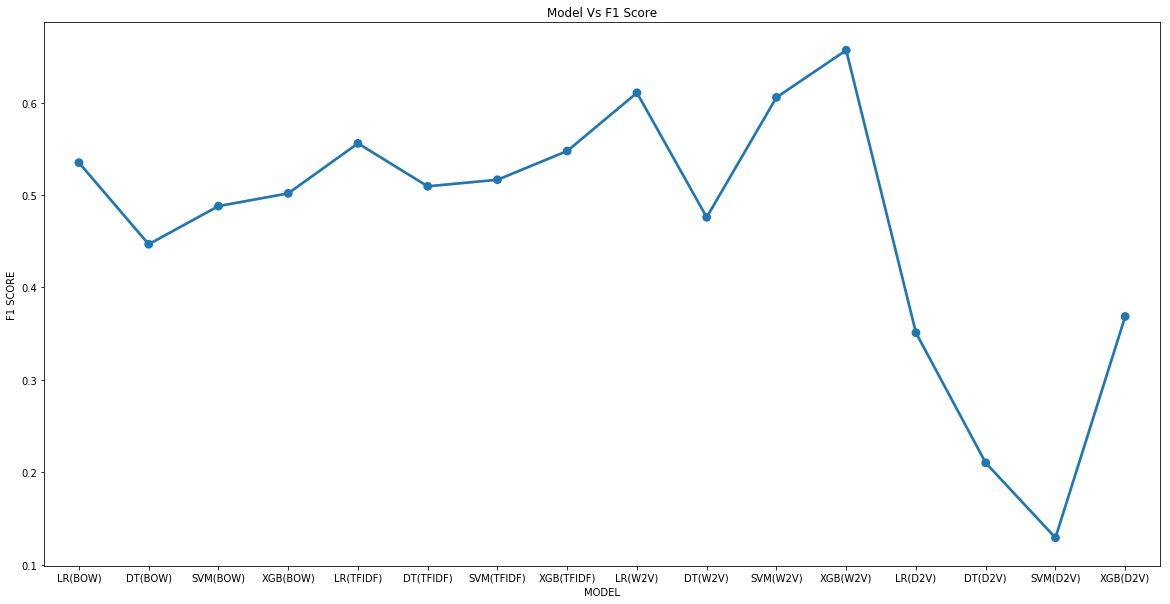

In [373]:
plt.figure(figsize=(20,10))
sns.pointplot(data=compare,x='Model',y='F1 score')
plt.title('Model Vs F1 Score')
plt.xlabel('MODEL')
plt.ylabel('F1 SCORE')

plt.show()

#### From the above comparison graph,we can see that Gradient Boosted Decision Trees(XGB) model trained using Word2vec features gives us the best performance.
#### Now we use the above model to predict test data 

In [377]:
test_word2vec = wordvec_df.iloc[31962:]

In [380]:
test_pred = xgb.predict_proba(test_word2vec)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test_data['label'] = test_pred_int

sub = test_data[['id','label']]

sub.to_csv('result.csv',index=False)

In [395]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,0
17193,49156,0
17194,49157,0
17195,49158,0


## Summary

From the given dataset, we were able to predict in which class(Positive or Negative) does the given tweet fall into by applying Gradient Boosted Decision Trees Model using Word2Vec features.

#### Pre-processing
1.Removing Twitter Handles(@user)

2.Removing puntuation,numbers,special characters

3.Removing short words i.e. words with length<3

4.Tokenization

5.Stemming

#### Data Visualisation

1.Wordclouds

2.Barplots

#### Word Embeddings used to convert words to features

1.Bag of words

2.TFIDF

3.Word2Vec

4.Doc2Vec

#### Machine Learning Models

1.Logistic Regression

2.Decision Tree

3.Support Vector Machine

4.Gradient Boosted Decision Trees

#### Evaluation Metric

1.F1 score

#### Why use F1-Score instead of Accuracy ?
From the given dataset,We know that the values with label:0 i.e. positive sentiments are quite high in number as compared to the values with labels:1 i.e. negative sentiments.
So when we keep accuracy as our evaluation metric there may be cases where we may encounter high number of false positives.

Precision means the percentage of your results which are relevant.
Recall refers to the percentage of total relevant results correctly classified by the algorithm.

Precision = True positive/(True positive + False positive)

Recall = True positive/ (True positive + False negative)

Accuracy = (True positive + True negative)/Total

We always face a trade-off situation between Precison and Recall i.e. High Precison gives low recall and vice versa.

In most problems, you could either give a higher priority to maximizing precision or recall, depending upon the problem you are trying to solve. But in general, there is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximize this number to make your model better. This metric is known as F1-score, which is simply the harmonic mean of precision and recall.

F1 score = 2x((Precision x Recall)/(Precision+Recall))